In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

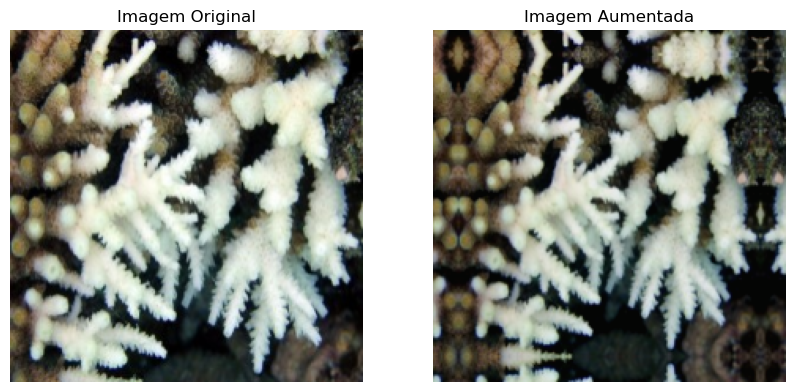

In [78]:
# Carregar uma imagem de exemplo (substitua pelo caminho da sua imagem)
image_path = 'dataset/bleached_corals/392871468_82f033b05d_o.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [224, 224])
image = tf.cast(image, tf.float32)

# Definir a sequência de aumentos
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    # tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    # tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.Rescaling(1./255)
])

# Aplicar os aumentos
augmented_image = data_augmentation(image[tf.newaxis, ...], training=True)

# Visualizar a imagem original e a aumentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image / 255.0)
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image[0])
plt.title("Imagem Aumentada")
plt.axis("off")

plt.show()